# 1D Random Walk

A 1D random walk describes the movement of a particle along a line, where at each discrete time step, the particle moves right (+1) with probability
<code>𝑝</code> or left (–1) with probability <code>1−𝑝</code>.

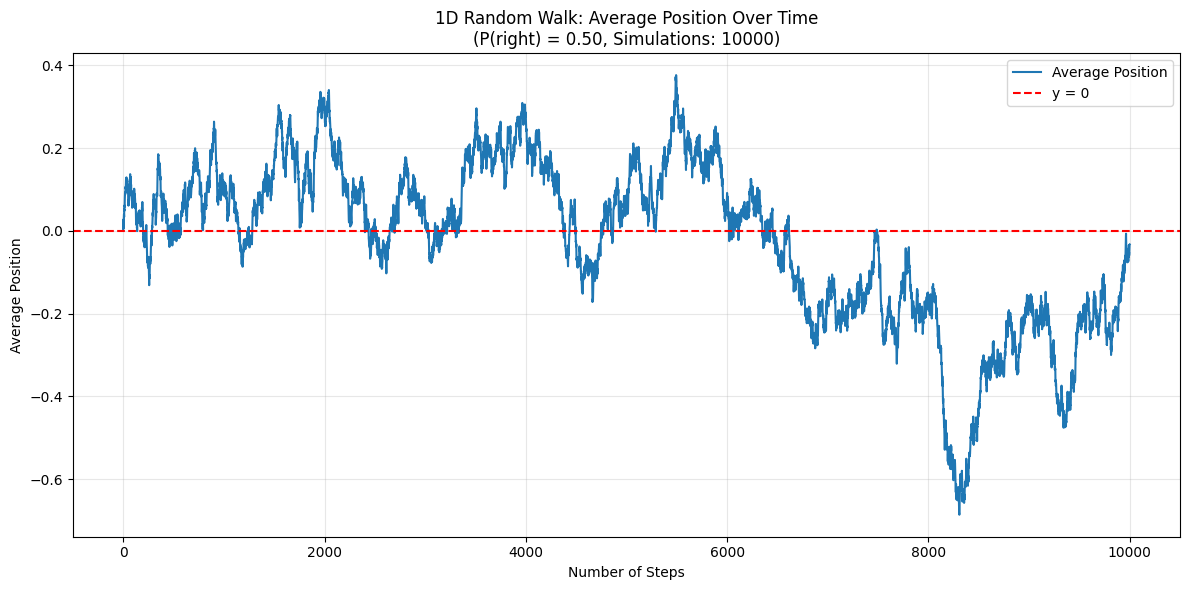

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 10000
steps = 10000
p_right = 0.5  # symmetric random walk

def simulate_random_walks(num_simulations, steps, p_right):
    walks = np.zeros((num_simulations, steps))
    for i in range(num_simulations):
        # 1 for right, -1 for left
        step_choices = np.random.choice([1, -1], size=steps, p=[p_right, 1 - p_right])
        walks[i] = np.cumsum(step_choices)
    return walks

# average position over time
def plot_average_position(walks, p_right, num_simulations):
    avg_position = np.mean(walks, axis=0)
    steps = len(avg_position)

    plt.figure(figsize=(12, 6))
    plt.plot(range(steps), avg_position, label='Average Position')
    plt.axhline(y=0, color='r', linestyle='--', label='y = 0')
    plt.xlabel('Number of Steps')
    plt.ylabel('Average Position')
    plt.title(f'1D Random Walk: Average Position Over Time\n'
              f'(P(right) = {p_right:.2f}, Simulations: {num_simulations})')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

walks = simulate_random_walks(num_simulations, steps, p_right)
plot_average_position(walks, p_right, num_simulations)

>The above simulation shows the average position of a 1D random walk for 10000 steps.

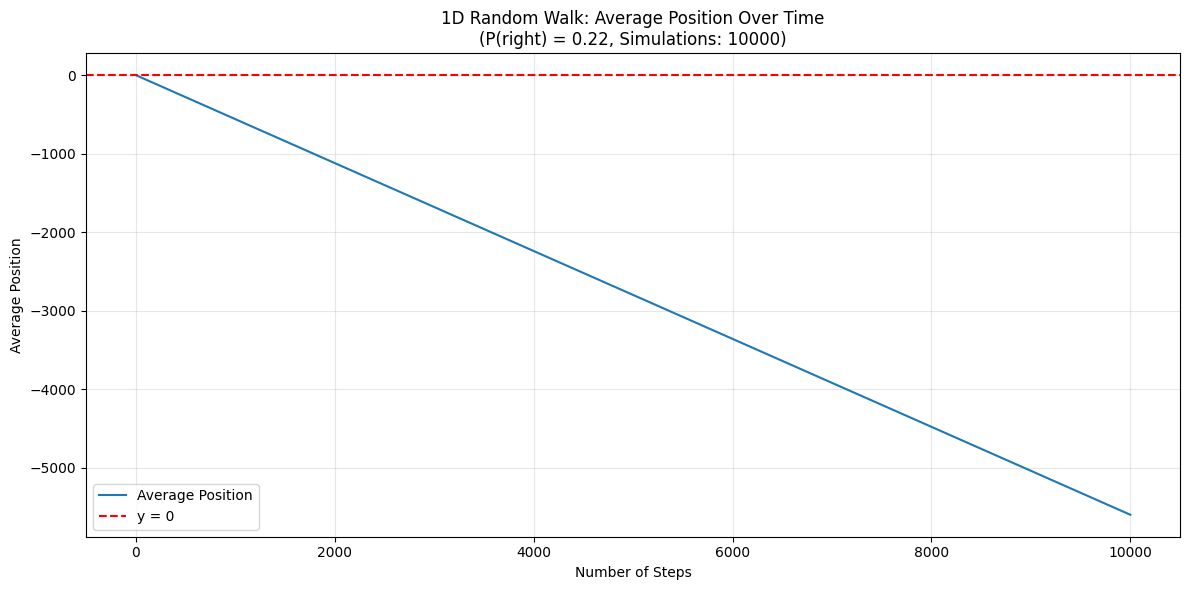

In [ ]:
# parameters for 1D left-biased random walk simulation
num_simulations = 10000
steps = 10000
p_right = 0.22  # left-biased random walk

walks = simulate_random_walks(num_simulations, steps, p_right)
plot_average_position(walks, p_right, num_simulations)

>>The average position drifts positively over time due to the bias toward right steps <code>𝑝=0.22</code>, indicating a linear divergence in mean position.
This biased 1D random walk is transient, meaning the particle has a non-zero probability of never returning to the origin.

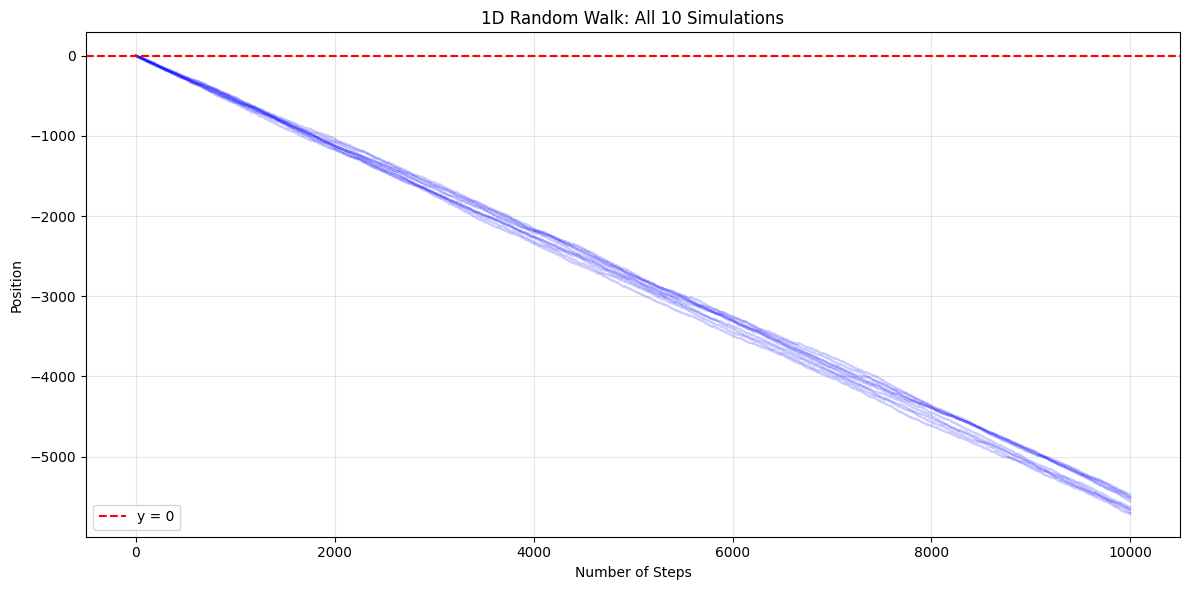

In [ ]:
def plot_all_walks(walks, num_simulations):
    plt.figure(figsize=(12, 6))

    for i in range(num_simulations):
        plt.plot(range(steps), walks[i], alpha=0.2, color='blue')

    plt.axhline(y=0, color='r', linestyle='--', label='y = 0')
    plt.xlabel('Number of Steps')
    plt.ylabel('Position')
    plt.title(f'1D Random Walk: All {num_simulations} Simulations')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot all simulations
walks = simulate_random_walks(num_simulations, steps, 0.22)
plot_all_walks(walks, 10)

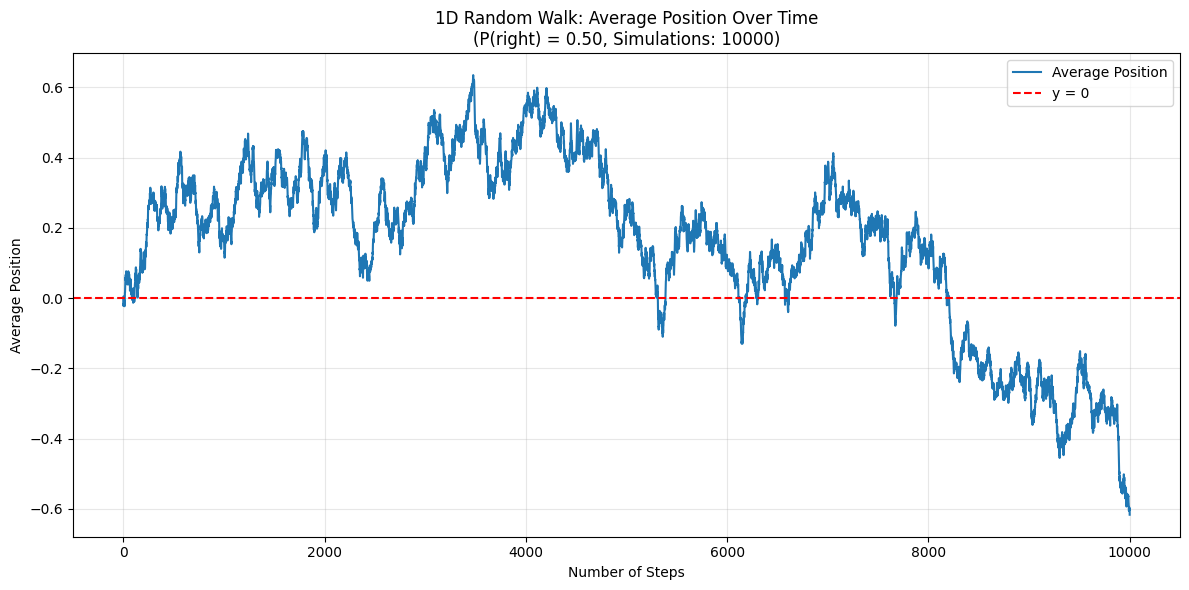

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters for 1D symmetric random walk simulation
num_simulations = 10000
steps = 10000
p_right = 0.5  # symmetric random walk

walks = simulate_random_walks(num_simulations, steps, p_right)
plot_average_position(walks, p_right, num_simulations)

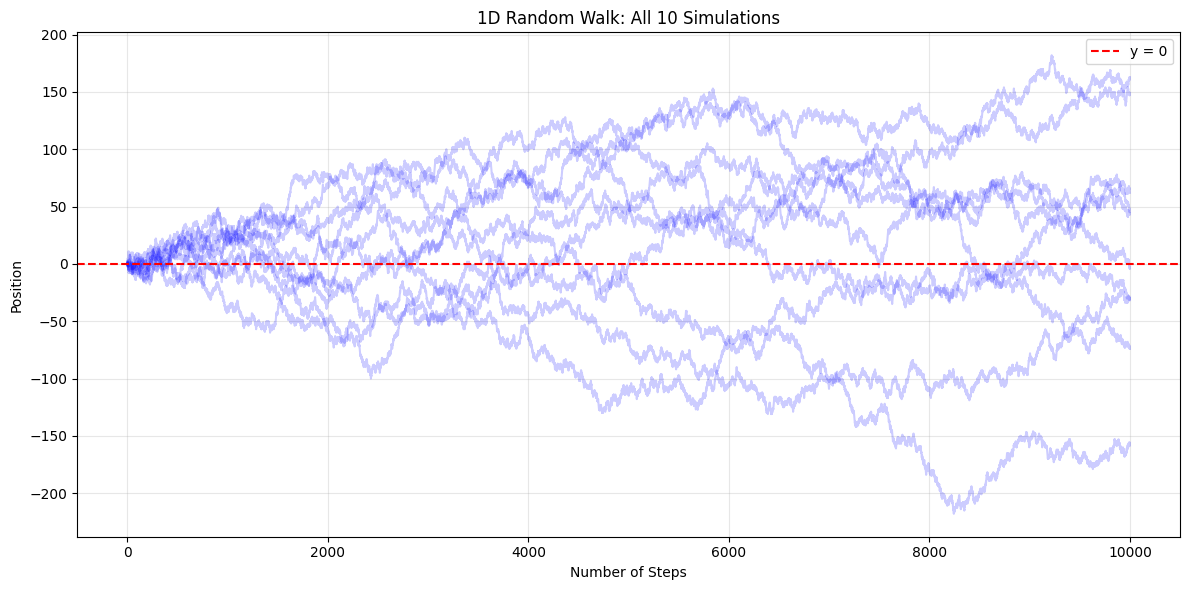

In [ ]:
walks = simulate_random_walks(num_simulations, steps, 0.5)
plot_all_walks(walks, 10)

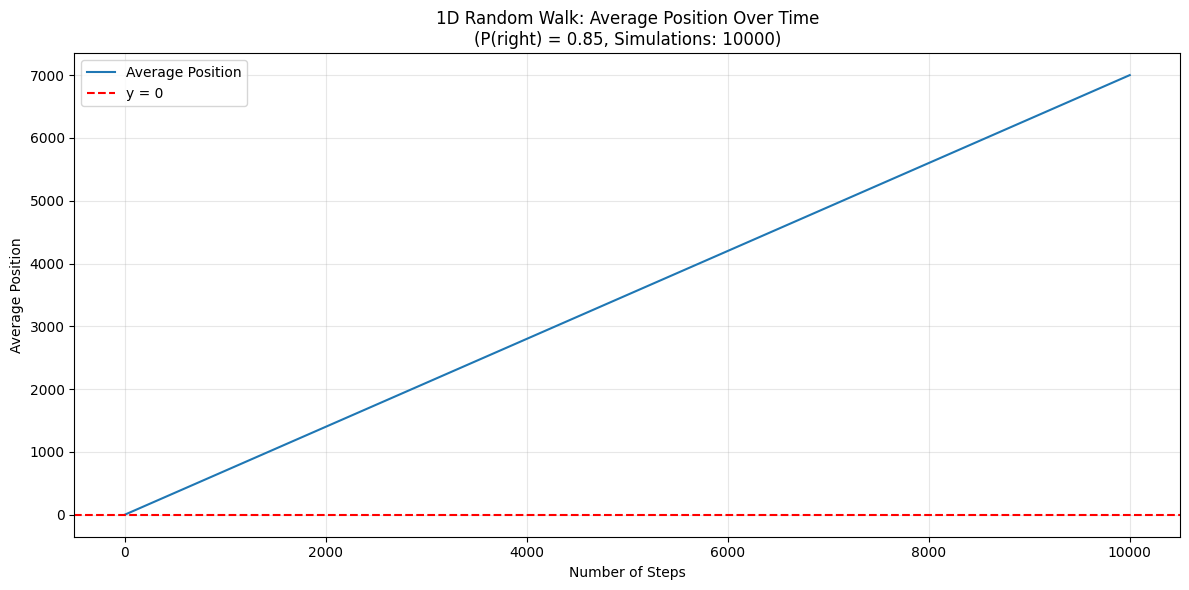

In [ ]:
# parameters for 1D right-biased random walk simulation
num_simulations = 10000
steps = 10000
p_right = 0.85  # rihght-biased random walk

walks = simulate_random_walks(num_simulations, steps, p_right)
plot_average_position(walks, p_right, num_simulations)

>>The average position drifts positively over time due to the bias toward right steps <code>𝑝=0.85</code>, indicating a linear divergence in mean position.
This biased 1D random walk is transient, meaning the particle has a non-zero probability of never returning to the origin.:

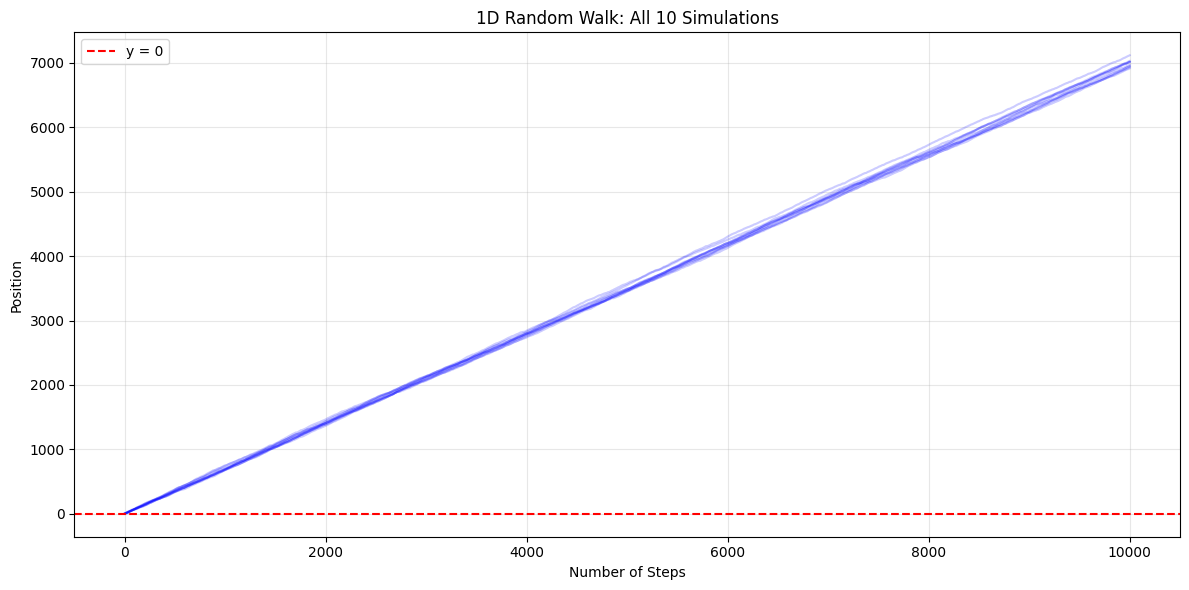

In [ ]:
walks = simulate_random_walks(num_simulations, steps, 0.85)
plot_all_walks(walks, 10)

### Recurrence vs Transience:
#### Recurrence: <br>
The probability that the walker returns to the origin at least once (and infinitely often).
#### Transience: <br>
The walker may never return to the origin.<br>
In 1D, recurrence and transience depend on <code>𝑝</code>
as:<br>
1. If <code>𝑝 = 0.5 (unbiased)</code>, the walk is <strong>recurrent</strong> → returns to origin infinitely often with probability 1.<br>
2. If <code>𝑝 ≠ 0.5 (biased)</code>, the walk is <strong>transient</strong> → there’s a non-zero positive probability/chance the particle never returns.


P(right) = 0.50 → Return Probability ≈ 0.9770
P(right) = 0.60 → Return Probability ≈ 0.8015
P(right) = 0.70 → Return Probability ≈ 0.6015
P(right) = 0.80 → Return Probability ≈ 0.3928


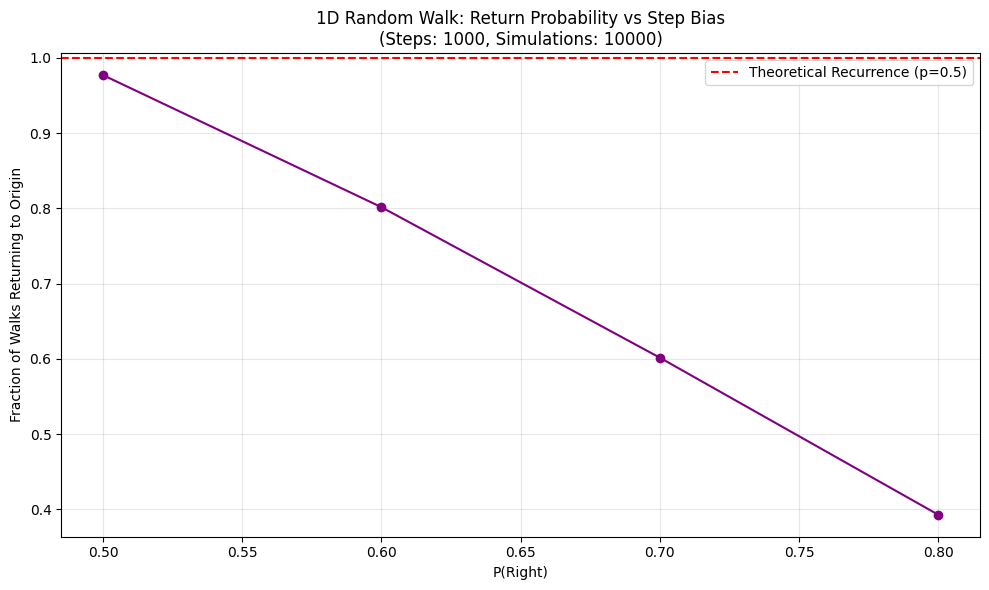

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 10000
steps = 1000
p_values = [0.5, 0.6, 0.7, 0.8]  # unbiased and biased examples

# simulate and check return to origin
def simulate_return_probabilities(num_simulations, steps, p_values):
    return_probs = []

    for p_right in p_values:
        walks = np.zeros((num_simulations, steps))
        for i in range(num_simulations):
            steps_array = np.random.choice([1, -1], size=steps, p=[p_right, 1 - p_right])
            walks[i] = np.cumsum(steps_array)

        # check if walk ever returns to origin
        returns_to_origin = np.any(walks == 0, axis=1)
        prob_return = np.mean(returns_to_origin)
        return_probs.append(prob_return)

        print(f"P(right) = {p_right:.2f} → Return Probability ≈ {prob_return:.4f}")

    return p_values, return_probs

p_vals, return_probs = simulate_return_probabilities(num_simulations, steps, p_values)

plt.figure(figsize=(10, 6))
plt.plot(p_vals, return_probs, marker='o', linestyle='-', color='purple')
plt.axhline(y=1.0, color='r', linestyle='--', label='Theoretical Recurrence (p=0.5)')
plt.xlabel('P(Right)')
plt.ylabel('Fraction of Walks Returning to Origin')
plt.title(f'1D Random Walk: Return Probability vs Step Bias\n(Steps: {steps}, Simulations: {num_simulations})')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

>>As we can obeserve from the above graph, the more we increase the right step probability the less is the probability of returning to origin(the starting point).

# 2D Random Walk

A <strong>2D random walk</strong> describes a process where a particle moves on a plane, stepping in one of four directions — <strong>right, left, up, or down</strong> — at each time step. The direction is chosen based on specified probabilities, often uniformly at random.

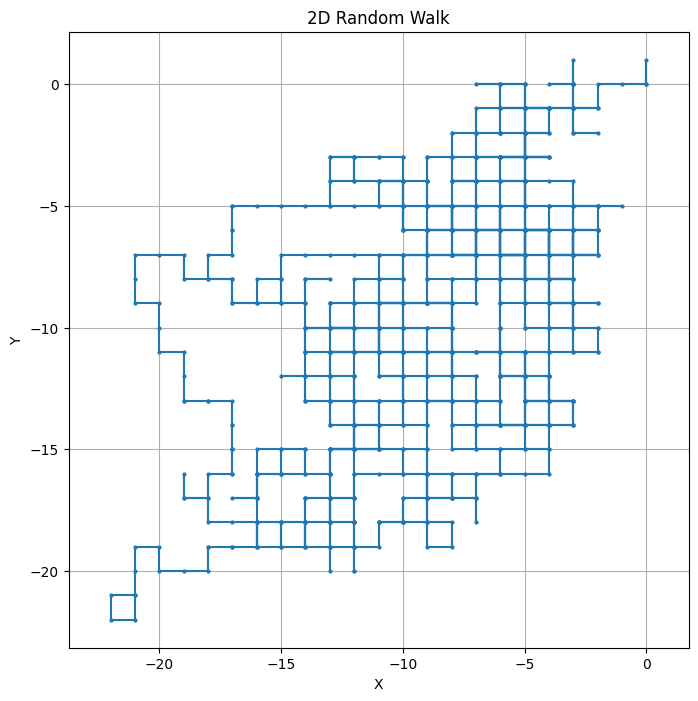

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_steps = 1000
x, y = [0], [0]  # start at origin

# random walk simulation
for _ in range(n_steps):
  angle = np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2])  # 0, 90, 180, 270 degrees
  dx, dy = np.cos(angle), np.sin(angle)
  x.append(x[-1] + dx)
  y.append(y[-1] + dy)

plt.figure(figsize=(8, 8))
plt.plot(x, y, marker='o', markersize=2)
plt.title("2D Random Walk")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis("equal")
plt.show()

>>1. The simulation shows a single path of a 2D random walk, where the particle moves in discrete steps at right angles, randomly choosing among four directions at each step.<br>
>>2. Over time, the path wanders away from the origin, illustrating the divergent displacement and diffusive nature of random walks in two dimensions.

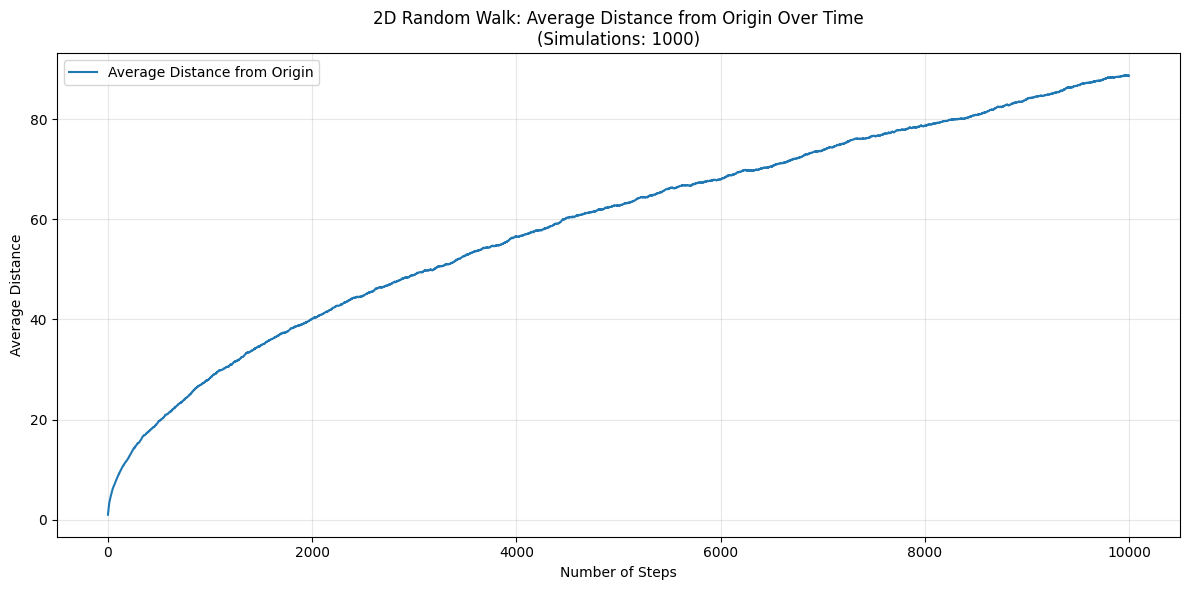

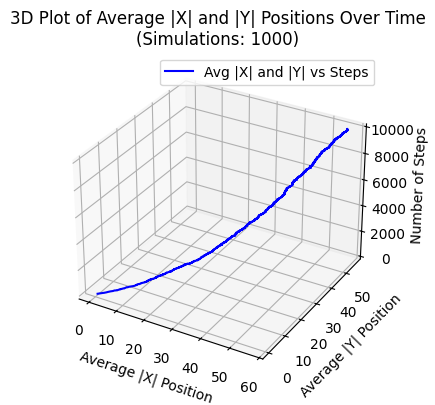

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# parameters
num_simulations = 1000
steps = 10000

# Vectorized direction map
direction_map = np.array([[1,0], [0,1], [-1,0], [0,-1]])
directions = np.random.choice(4, size=(num_simulations, steps))
dx_dy = direction_map[directions]

# cumulative positions
positions = np.cumsum(dx_dy, axis=1)

# distance from origin
distances = np.linalg.norm(positions, axis=2)
avg_distance = np.mean(distances, axis=0)

# average distance from origin
plt.figure(figsize=(12, 6))
plt.plot(range(steps), avg_distance, label='Average Distance from Origin')
plt.xlabel('Number of Steps')
plt.ylabel('Average Distance')
plt.title(f'2D Random Walk: Average Distance from Origin Over Time\n(Simulations: {num_simulations})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# average |X| vs |Y| vs steps
x_positions = positions[:, :, 0]
y_positions = positions[:, :, 1]

avg_abs_x = np.mean(np.abs(x_positions), axis=0)
avg_abs_y = np.mean(np.abs(y_positions), axis=0)
step_numbers = np.arange(steps)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot(avg_abs_x, avg_abs_y, step_numbers, label='Avg |X| and |Y| vs Steps', color='blue')
ax.set_xlabel('Average |X| Position')
ax.set_ylabel('Average |Y| Position')
ax.set_zlabel('Number of Steps')
ax.set_title(f'3D Plot of Average |X| and |Y| Positions Over Time\n(Simulations: {num_simulations})')
ax.legend()
plt.tight_layout()
plt.show()

>>1. The line plot demonstrates that the <strong>average distance from the origin increases over time</strong>, confirming the <strong>divergent nature of 2D random walks</strong> in displacement.<br>
>>2. The 3D plot illustrates how the <strong>average absolute displacements along X and Y axes both grow with the number of steps</strong>, maintaining symmetry and diffusion typical of unbiased 2D random walks.

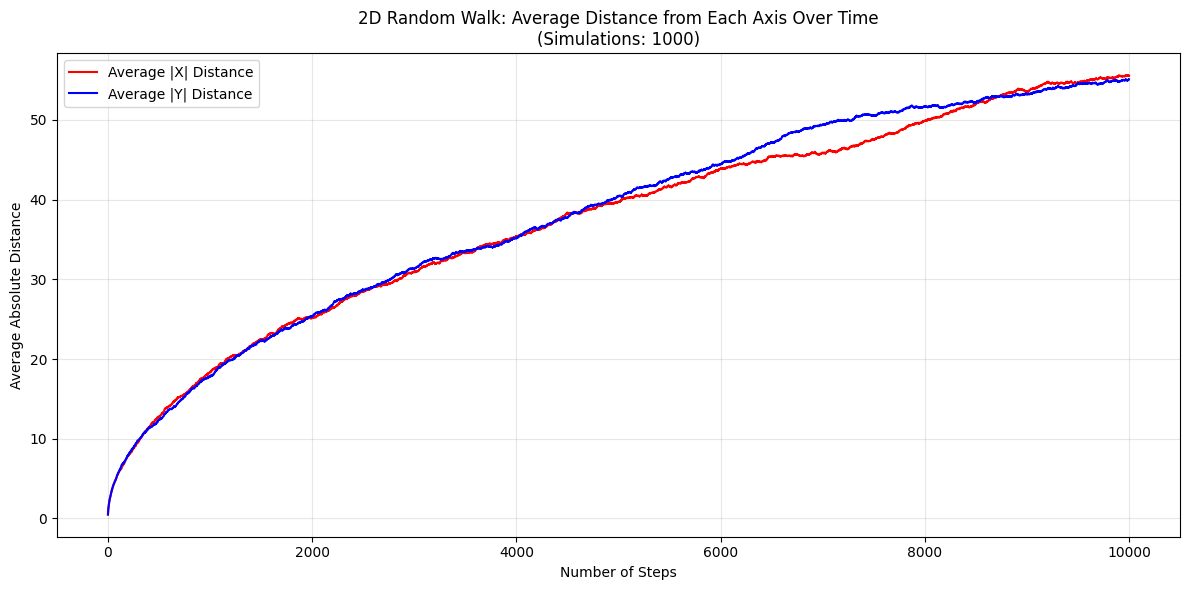

In [ ]:
directions = np.random.choice(4, size=(num_simulations, steps))
dx_dy = direction_map[directions]

# cumulative positions
positions_2d = np.cumsum(dx_dy, axis=1)

# average absolute distance from origin along each axis
abs_positions_2d = np.abs(positions_2d)

avg_dist_x_2d = np.mean(abs_positions_2d[:, :, 0], axis=0)
avg_dist_y_2d = np.mean(abs_positions_2d[:, :, 1], axis=0)

# average distance from X and Y Axes vs steps
plt.figure(figsize=(12, 6))
plt.plot(range(steps), avg_dist_x_2d, label='Average |X| Distance', color='red')
plt.plot(range(steps), avg_dist_y_2d, label='Average |Y| Distance', color='blue')

plt.xlabel('Number of Steps')
plt.ylabel('Average Absolute Distance')
plt.title(f'2D Random Walk: Average Distance from Each Axis Over Time\n(Simulations: {num_simulations})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

>>The plot shows that the <strong>average absolute distances from both the X and Y axes increase proportionally with the number of steps</strong>, illustrating symmetry and diffusion in both directions.<br>
This behavior is consistent with unbiased 2D random walks, where particles spread out evenly from the origin over time without directional preference.

>>

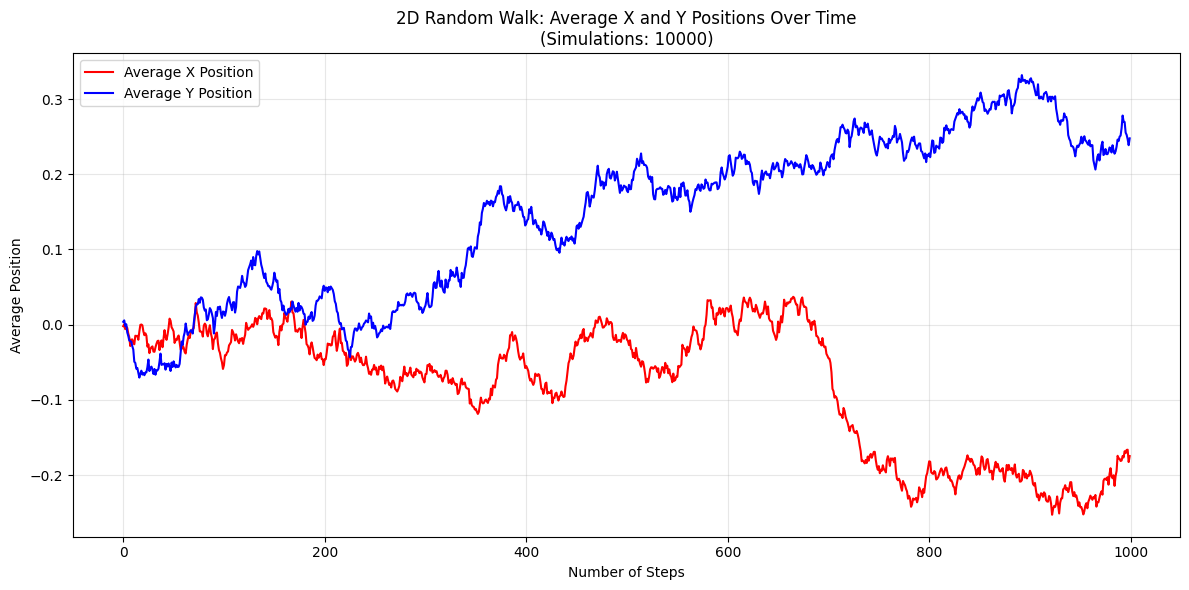

In [ ]:
directions = np.random.choice(4, size=(num_simulations, steps))
dx_dy = direction_map[directions]

positions_2d = np.cumsum(dx_dy, axis=1)

avg_pos_x_2d = np.mean(positions_2d[:, :, 0], axis=0)
avg_pos_y_2d = np.mean(positions_2d[:, :, 1], axis=0)

# average position along X and Y axes vs steps
plt.figure(figsize=(12, 6))
plt.plot(range(steps), avg_pos_x_2d, label='Average X Position', color='red')
plt.plot(range(steps), avg_pos_y_2d, label='Average Y Position', color='blue')

plt.xlabel('Number of Steps')
plt.ylabel('Average Position')
plt.title(f'2D Random Walk: Average X and Y Positions Over Time\n(Simulations: {num_simulations})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3D Random Walk

A <strong>3D random walk</strong> consists of a sequence of steps taken in three-dimensional space, where at each step, the walker randomly chooses to move along one of the six possible directions: <code>+x, -x, +y, -y, +z, -z</code>.

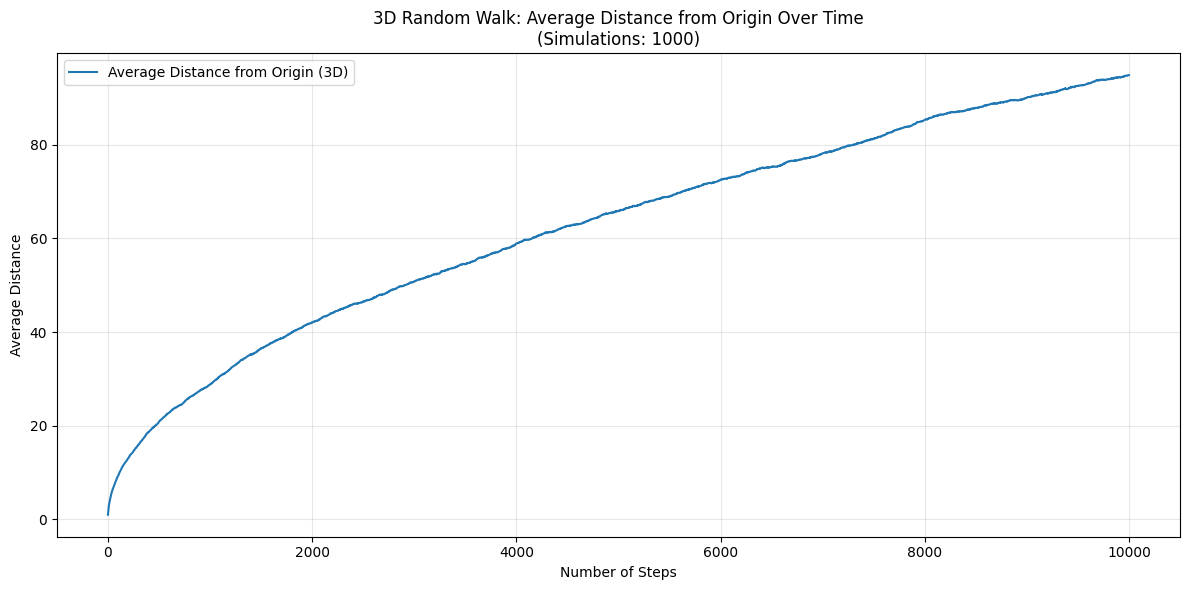

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
num_simulations = 1000
steps = 10000

# direction map
direction_map_3d = np.array([
    [1, 0, 0], [-1, 0, 0],  # +x, -x
    [0, 1, 0], [0, -1, 0],  # +y, -y
    [0, 0, 1], [0, 0, -1]   # +z, -z
])

directions_3d = np.random.choice(6, size=(num_simulations, steps))
dx_dy_dz = direction_map_3d[directions_3d]

# cumulative positions
positions_3d = np.cumsum(dx_dy_dz, axis=1)

# distance from origin
distances_3d = np.linalg.norm(positions_3d, axis=2)
avg_distance_3d = np.mean(distances_3d, axis=0)

# average distance vs steps
plt.figure(figsize=(12, 6))
plt.plot(range(steps), avg_distance_3d, label='Average Distance from Origin (3D)')
plt.xlabel('Number of Steps')
plt.ylabel('Average Distance')
plt.title(f'3D Random Walk: Average Distance from Origin Over Time\n(Simulations: {num_simulations})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

>>The average distance from the origin in a 3D random walk increases roughly proportionally to the square root of the number of steps, reflecting the diffusive nature of random motion in higher dimensions. Unlike in 1D or 2D where the walker is recurrent, in 3D, the walk is transient, and the increasing distance suggests a diminishing likelihood of return to the origin over time.

>>As the number of steps increases, the displacement from the origin tends to increase without bound, even in symmetric walks.

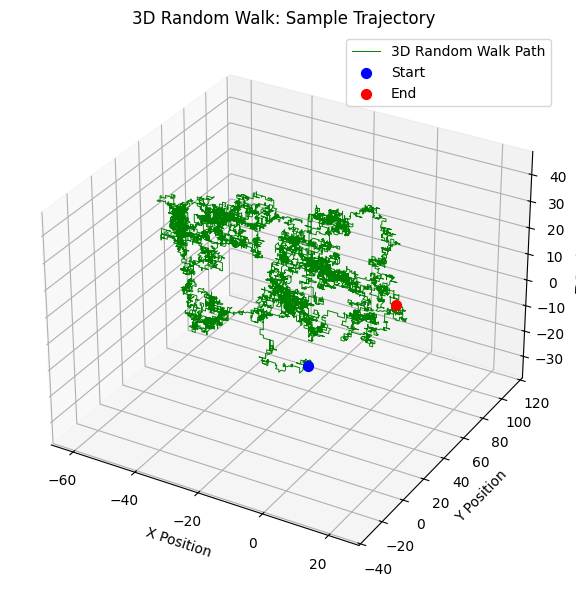

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D sample trajectory
sample_walk = positions_3d[0]
x_traj = sample_walk[:, 0]
y_traj = sample_walk[:, 1]
z_traj = sample_walk[:, 2]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_traj, y_traj, z_traj, color='green', lw=0.7, label='3D Random Walk Path')

# start and end points
ax.scatter(x_traj[0], y_traj[0], z_traj[0], color='blue', s=50, label='Start')
ax.scatter(x_traj[-1], y_traj[-1], z_traj[-1], color='red', s=50, label='End')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('3D Random Walk: Sample Trajectory')
ax.legend()
plt.tight_layout()
plt.show()

>>The 3D random walk sample trajectory illustrates a highly random and unbounded path through space, with the walker drifting away from the origin over time. The visualization ecorresponds to transience of the random walk.

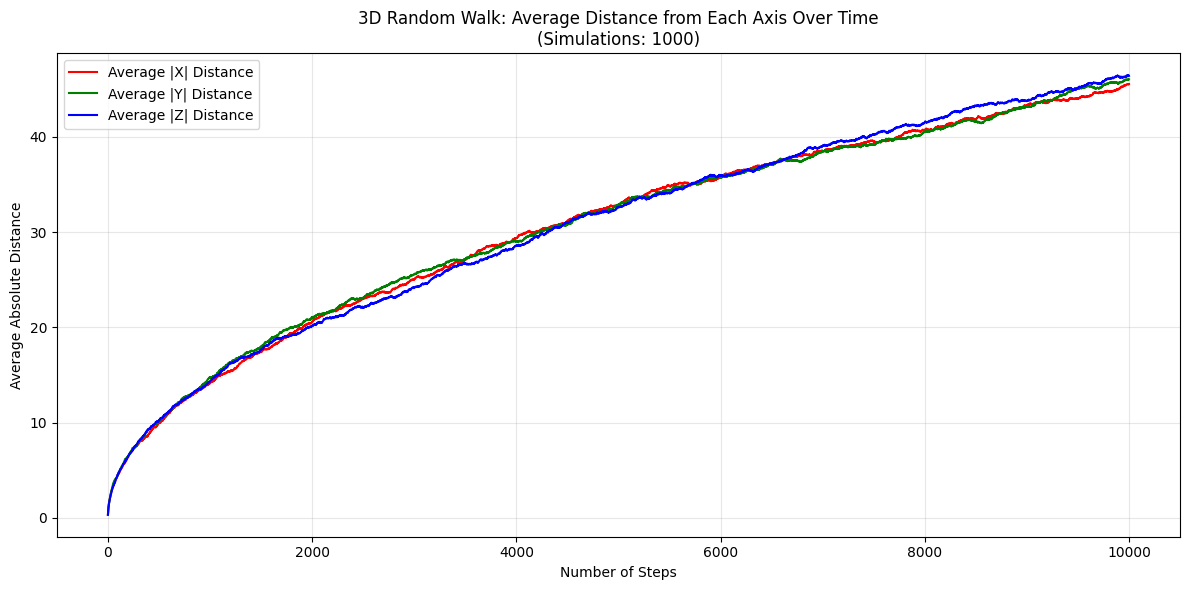

In [ ]:
# average absolute distance from origin along each axis
abs_positions = np.abs(positions_3d)

avg_dist_x = np.mean(abs_positions[:, :, 0], axis=0)
avg_dist_y = np.mean(abs_positions[:, :, 1], axis=0)
avg_dist_z = np.mean(abs_positions[:, :, 2], axis=0)

# average distance from each axis vs steps
plt.figure(figsize=(12, 6))
plt.plot(range(steps), avg_dist_x, label='Average |X| Distance', color='red')
plt.plot(range(steps), avg_dist_y, label='Average |Y| Distance', color='green')
plt.plot(range(steps), avg_dist_z, label='Average |Z| Distance', color='blue')

plt.xlabel('Number of Steps')
plt.ylabel('Average Absolute Distance')
plt.title(f'3D Random Walk: Average Distance from Each Axis Over Time\n(Simulations: {num_simulations})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

>>The <strong>average absolute distances along the X, Y, and Z axes increase</strong> steadily and symmetrically over time, indicating isotropic behavior of the 3D random walk. This uniform growth along all axes highlights the absence of directional bias and reflects the tendency to drift equally in all dimensions.

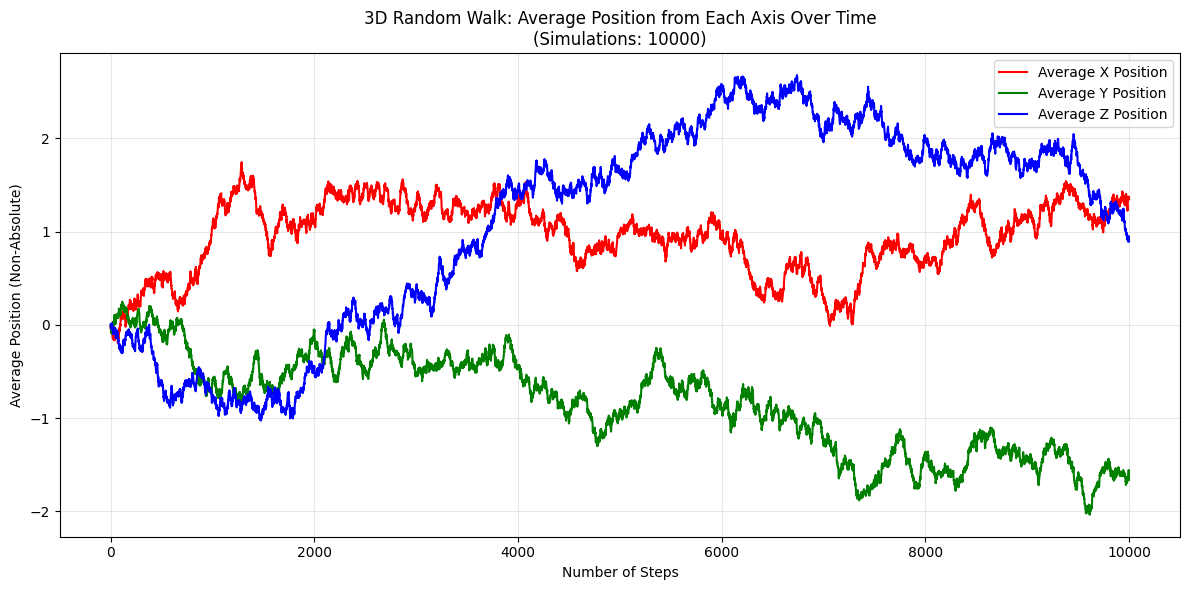

In [ ]:
# average position from origin
avg_pos_x = np.mean(positions_3d[:, :, 0], axis=0)
avg_pos_y = np.mean(positions_3d[:, :, 1], axis=0)
avg_pos_z = np.mean(positions_3d[:, :, 2], axis=0)

plt.figure(figsize=(12, 6))
plt.plot(range(steps), avg_pos_x, label='Average X Position', color='red')
plt.plot(range(steps), avg_pos_y, label='Average Y Position', color='green')
plt.plot(range(steps), avg_pos_z, label='Average Z Position', color='blue')

plt.xlabel('Number of Steps')
plt.ylabel('Average Position (Non-Absolute)')
plt.title(f'3D Random Walk: Average Position from Each Axis Over Time\n(Simulations: {num_simulations})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

>>In 3D random walks, the average position along each axis fluctuates around zero, indicating no directional bias over time.

In [ ]:
# parameters
num_simulations = 10000
steps = 10000
return_threshold = 0

# direction map
direction_map_3d = np.array([
  [1, 0, 0], [-1, 0, 0],  # ±x
  [0, 1, 0], [0, -1, 0],  # ±y
  [0, 0, 1], [0, 0, -1]   # ±z
])

# return occurrences
returns_to_origin = 0

for sim in range(num_simulations):
  directions = np.random.choice(6, size=steps)
  moves = direction_map_3d[directions]
  positions = np.cumsum(moves, axis=0)

  # check if origin reached
  origin_hits = np.any(np.all(positions == 0, axis=1))
  if origin_hits:
    returns_to_origin += 1

# return probability
return_probability = returns_to_origin / num_simulations
print(f"Estimated Return Probability to Origin (3D, {num_simulations} sims): {return_probability:.4f}")

Estimated Return Probability to Origin (3D, 10000 sims): 0.3377


### Transience and Recurrence:

1. In 3D, the random walk is <strong>transient</strong>, meaning the probability that the walker eventually returns to the origin is less than 1.<br>
2. Unlike in 1D and 2D, where the walker is recurrent under symmetric conditions (eventually returns to the starting point with probability 1), in 3D, there is a non-zero chance the walker never returns to the origin.<br>
3. Specifically, <strong>the return probability to the origin is about 34%</strong>, implying that in the majority of simulations, the walker moves away indefinitely.

# 3D Random Walk to Brownian Motion

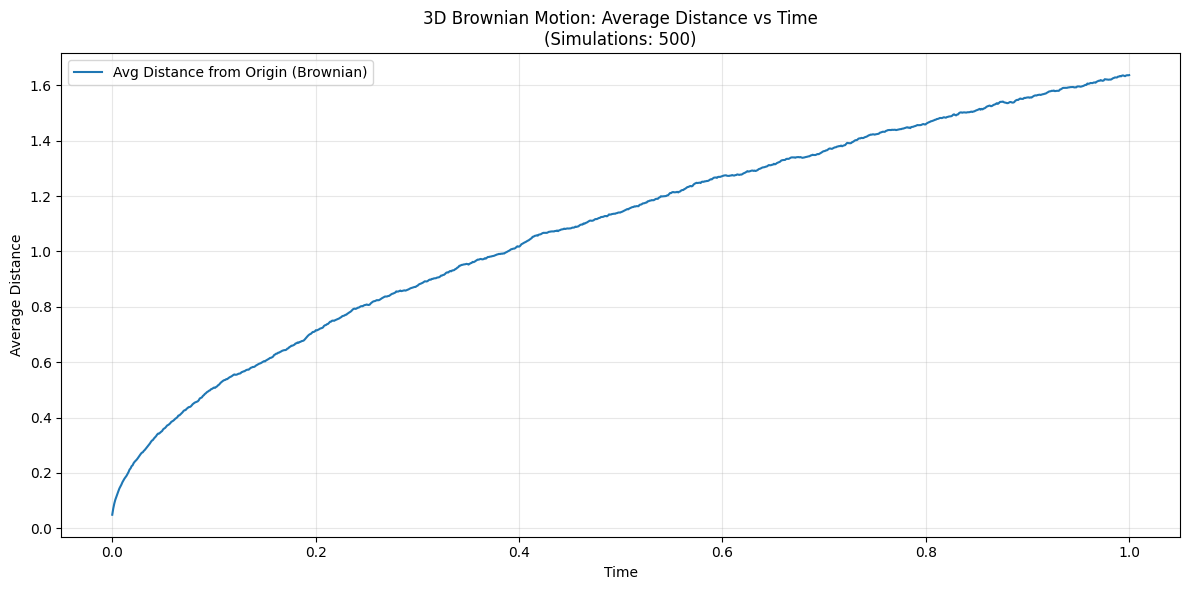

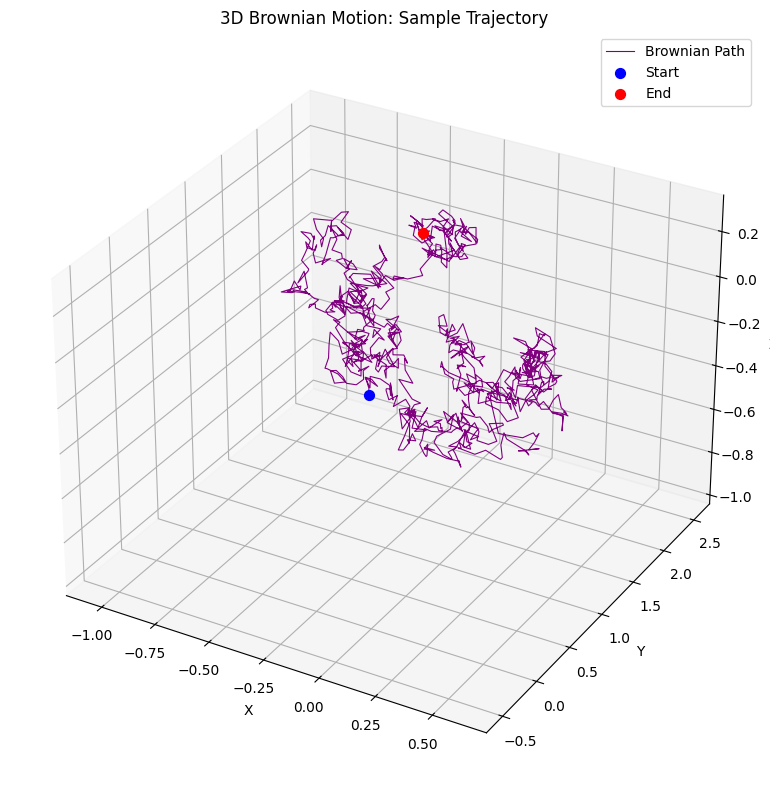

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

num_simulations = 500
steps = 1000
T = 1.0
dt = T / steps
sqrt_dt = np.sqrt(dt)

# Brownian motion: small Gaussian steps
dW = np.random.normal(loc=0.0, scale=sqrt_dt, size=(num_simulations, steps, 3))

# cumulative sum over steps gives Brownian paths
W = np.cumsum(dW, axis=1)

# distances from origin over time
distances_bm = np.linalg.norm(W, axis=2)
avg_distance_bm = np.mean(distances_bm, axis=0)

# average distance from origin
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, T, steps), avg_distance_bm, label='Avg Distance from Origin (Brownian)')
plt.xlabel('Time')
plt.ylabel('Average Distance')
plt.title(f'3D Brownian Motion: Average Distance vs Time\n(Simulations: {num_simulations})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# sample 3D trajectory
sample_bm_path = W[0]  # shape: (steps, 3)
x_bm, y_bm, z_bm = sample_bm_path[:, 0], sample_bm_path[:, 1], sample_bm_path[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bm, y_bm, z_bm, color='purple', lw=0.8, label='Brownian Path')

# start and end points
ax.scatter(x_bm[0], y_bm[0], z_bm[0], color='blue', s=50, label='Start')
ax.scatter(x_bm[-1], y_bm[-1], z_bm[-1], color='red', s=50, label='End')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Brownian Motion: Sample Trajectory')
ax.legend()
plt.tight_layout()
plt.show()

>>1. Average Distance Growth: The average distance from the origin increases proportionally to the square root of time (~√t), reflecting the diffusive nature of Brownian motion.<br>
2. Path Characteristics: The 3D Brownian trajectory appears continuous yet highly irregular, showing persistent deviation from the origin but with no preferred direction.

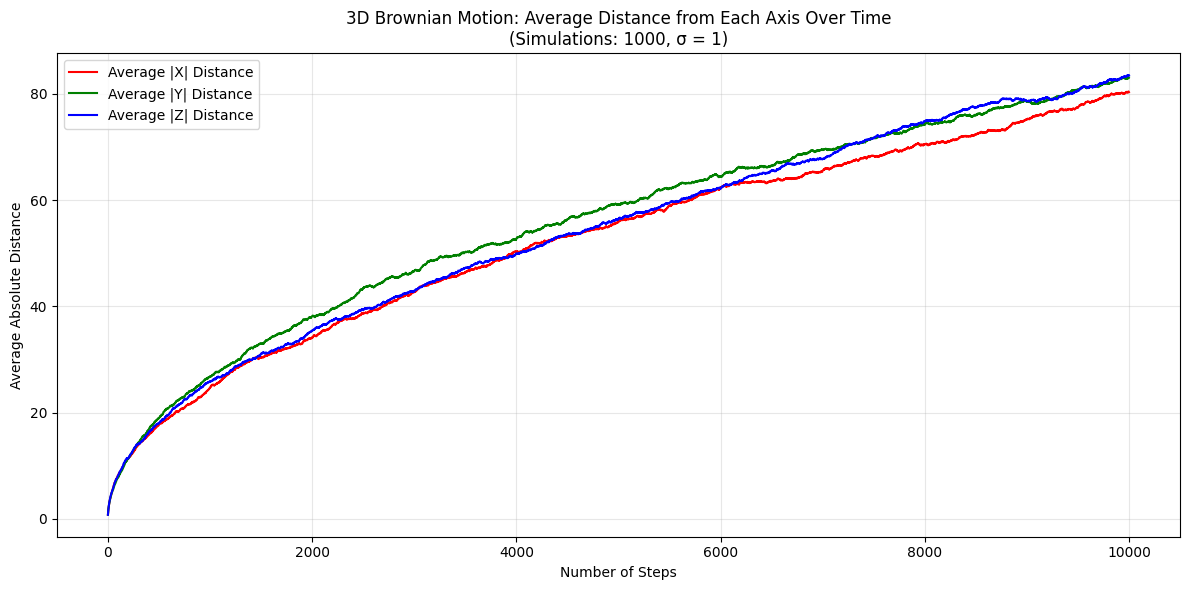

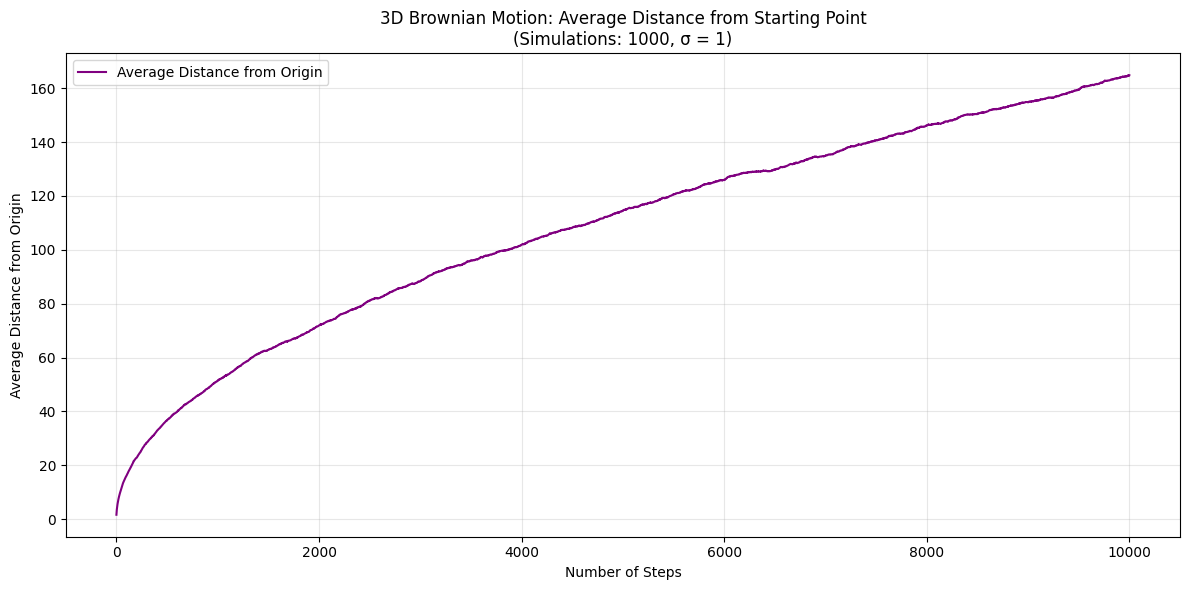

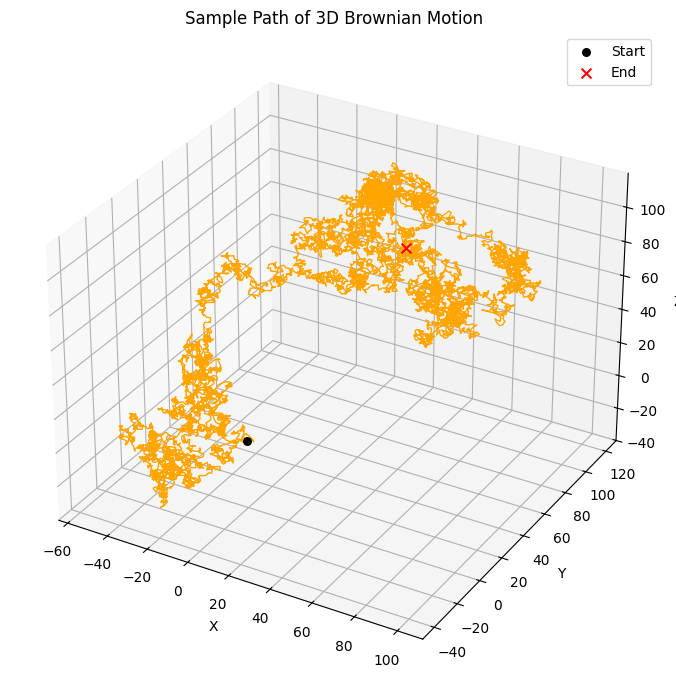

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# parameters
num_simulations = 1000
steps = 10000
delta_t = 1
sigma = 1

# 3D Brownian motion
gaussian_steps_3d = np.random.normal(loc=0, scale=np.sqrt(delta_t)*sigma, size=(num_simulations, steps, 3))
positions_bm_3d = np.cumsum(gaussian_steps_3d, axis=1)  # cumulative sum

# average absolute distance from each axis
abs_positions_bm_3d = np.abs(positions_bm_3d)
avg_dist_x_bm = np.mean(abs_positions_bm_3d[:, :, 0], axis=0)
avg_dist_y_bm = np.mean(abs_positions_bm_3d[:, :, 1], axis=0)
avg_dist_z_bm = np.mean(abs_positions_bm_3d[:, :, 2], axis=0)

# average distance from starting point
distances_from_origin = np.linalg.norm(positions_bm_3d, axis=2)  # eucleadian dist
avg_distance_origin = np.mean(distances_from_origin, axis=0)

# average |X|, |Y|, |Z| distances
plt.figure(figsize=(12, 6))
plt.plot(range(steps), avg_dist_x_bm, label='Average |X| Distance', color='red')
plt.plot(range(steps), avg_dist_y_bm, label='Average |Y| Distance', color='green')
plt.plot(range(steps), avg_dist_z_bm, label='Average |Z| Distance', color='blue')

plt.xlabel('Number of Steps')
plt.ylabel('Average Absolute Distance')
plt.title(f'3D Brownian Motion: Average Distance from Each Axis Over Time\n(Simulations: {num_simulations}, σ = {sigma})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# average distance from origin
plt.figure(figsize=(12, 6))
plt.plot(range(steps), avg_distance_origin, label='Average Distance from Origin', color='purple')
plt.xlabel('Number of Steps')
plt.ylabel('Average Distance from Origin')
plt.title(f'3D Brownian Motion: Average Distance from Starting Point\n(Simulations: {num_simulations}, σ = {sigma})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# sample path of simulation
sample_path = positions_bm_3d[0]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(sample_path[:, 0], sample_path[:, 1], sample_path[:, 2], color='orange', linewidth=1)
ax.scatter(0, 0, 0, color='black', marker='o', s=30, label='Start')
ax.scatter(sample_path[-1, 0], sample_path[-1, 1], sample_path[-1, 2], color='red', marker='x', s=50, label='End')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sample Path of 3D Brownian Motion')
ax.legend()
plt.tight_layout()
plt.show()

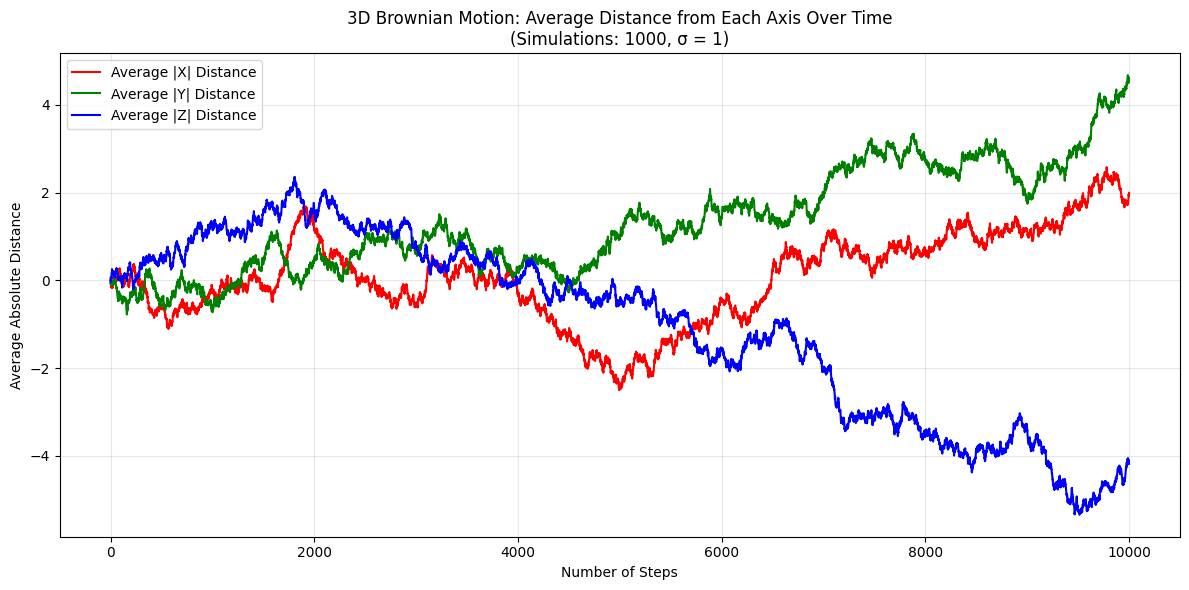

In [ ]:
# average distance from each axis
avg_dist_x_bm = np.mean(positions_bm_3d[:, :, 0], axis=0)
avg_dist_y_bm = np.mean(positions_bm_3d[:, :, 1], axis=0)
avg_dist_z_bm = np.mean(positions_bm_3d[:, :, 2], axis=0)

# average distance from starting point
distances_from_origin = np.linalg.norm(positions_bm_3d, axis=2)
avg_distance_origin = np.mean(distances_from_origin, axis=0)

# =average |X|, |Y|, |Z| distance
plt.figure(figsize=(12, 6))
plt.plot(range(steps), avg_dist_x_bm, label='Average |X| Distance', color='red')
plt.plot(range(steps), avg_dist_y_bm, label='Average |Y| Distance', color='green')
plt.plot(range(steps), avg_dist_z_bm, label='Average |Z| Distance', color='blue')

plt.xlabel('Number of Steps')
plt.ylabel('Average Absolute Distance')
plt.title(f'3D Brownian Motion: Average Distance from Each Axis Over Time\n(Simulations: {num_simulations}, σ = {sigma})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

>>The average X, Y, Z positions oscillate around zero, indicating no directional drift in the Brownian motion.<br>
This symmetry confirms the stochastic process is unbiased, with displacements equally likely in all directions over time.